# Highlights in this notebook
<ul>
    <li>Operating Revenue of Top US airlines,</li>
    <li>Part of the day (day, night, dawn, dusk) when these airlines are struck,</li>
    <li>What Phase of Flight gets the most bird strikes during day/night.</li>
</ul>

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
sns.set_style("whitegrid")

# Operating Revenue from 2000-2019 of top 14 U.S. Passenger airline

In [72]:
df = pd.read_excel("Revenue.xlsx")
dfnew= df.drop(columns=['DOMESTIC','LATIN AMERICA','INTERNATIONAL','ATLANTIC','PACIFIC'])

In [73]:
dfnew.head()

,Year,Airlines,Quarter,TOTAL
0,2000,Alaska,1,395136
1,2000,Alaska,2,446414
2,2000,Alaska,3,487055
3,2000,Alaska,4,431262
4,2000,Alaska,TOTAL,1759867


In [74]:
dfnew['TOTAL (in bn)'] = df['TOTAL']*1000/1000000000

In [75]:
dfnew.head()

,Year,Airlines,Quarter,TOTAL,TOTAL (in bn)
0,2000,Alaska,1,395136,0.395136
1,2000,Alaska,2,446414,0.446414
2,2000,Alaska,3,487055,0.487055
3,2000,Alaska,4,431262,0.431262
4,2000,Alaska,TOTAL,1759867,1.759867


In [76]:
df['Airlines'].unique()

array(['Alaska', 'Allegiant Air', 'American', 'Atlas', 'Delta Air',
       'Envoy Air', 'Frontier', 'Hawaiian', 'JetBlue', 'Republic',
       'SkyWest', 'Southwest', 'Spirit Air', 'United'], dtype=object)

In [77]:
print(df.loc[(df['Year'] == '2010') & (df['Quarter']=='TOTAL')])

Empty DataFrame
Columns: [Year, Airlines, Quarter, DOMESTIC, LATIN AMERICA, ATLANTIC, PACIFIC, INTERNATIONAL, TOTAL]
Index: []


c:\python3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [78]:
print(dfnew.loc[(df['Year']== 2009) & (df['Quarter']=='TOTAL')])

      Year       Airlines Quarter     TOTAL  TOTAL (in bn)
49    2009         Alaska   TOTAL   3005999       3.005999
129   2009  Allegiant Air   TOTAL    536465       0.536465
229   2009       American   TOTAL  19898245      19.898245
329   2009          Atlas   TOTAL    980290       0.980290
429   2009      Delta Air   TOTAL  18046580      18.046580
529   2009      Envoy Air   TOTAL   1845823       1.845823
629   2009       Frontier   TOTAL   1113397       1.113397
729   2009       Hawaiian   TOTAL   1183619       1.183619
829   2009        JetBlue   TOTAL   3287412       3.287412
902   2009       Republic   TOTAL    486878       0.486878
987   2009        SkyWest   TOTAL   1731346       1.731346
1087  2009      Southwest   TOTAL  10350338      10.350338
1187  2009     Spirit Air   TOTAL    700038       0.700038
1287  2009         United   TOTAL  16359238      16.359238


In [79]:
list=dfnew.loc[(df['Year']== 2009) & (df['Quarter']=='TOTAL')].values[0].tolist()
list[4]

3.005999

In [80]:
#In a specific year what is the Revenue for those airlines:

year = 2019
Airlines_list = sorted(df['Airlines'].unique())
Revenuelist=[]
for word in Airlines_list:
    list1=dfnew.loc[(df['Year']== year) &(df['Airlines']==word)& (df['Quarter']=='TOTAL')].values[0].tolist()
    Revenuelist.append(list1[4])
    
Revenuelist

[8.774664,
 1.745985,
 45.761125,
 2.337633,
 47.126335,
 1.385341,
 2.508349,
 2.830131,
 8.094008,
 1.349429,
 2.910753,
 22.427753,
 3.830536,
 43.258541]

In [81]:
Revenuelist[3]

2.337633

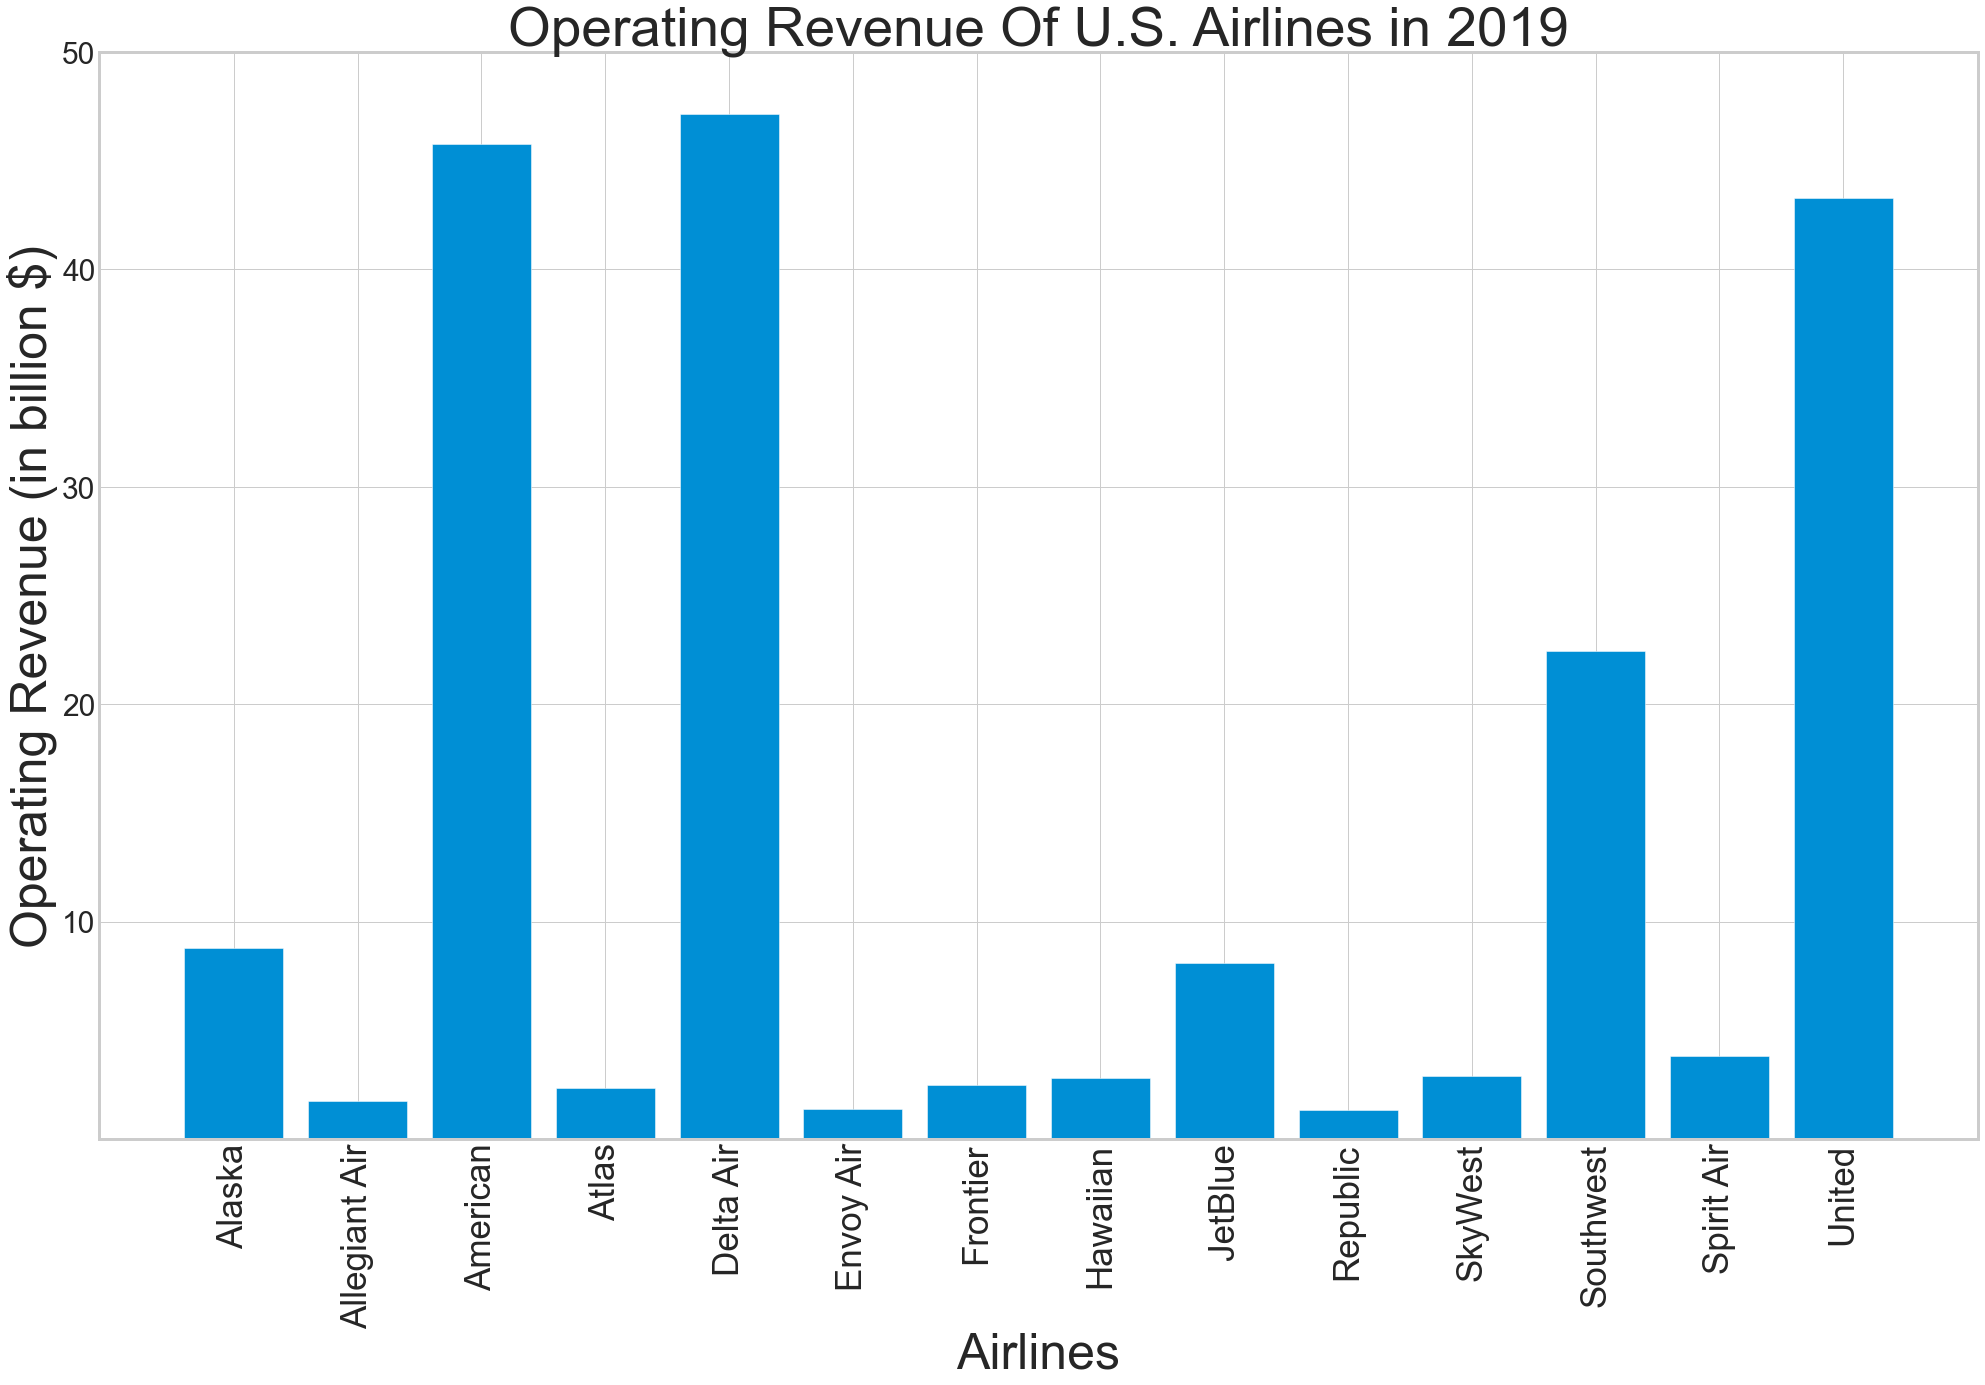

In [82]:
%matplotlib inline

plt.figure(figsize=(30,20))
xs=Airlines_list
ys=Revenuelist
#y_pos = np.arange(len(xs))
 
# Create bars
plt.bar(xs, ys)
 
# Create names on the x-axis
plt.xticks(xs,rotation=90 ,fontsize=35)
plt.yticks([10, 20, 30,40, 50],fontsize=30)

#x, y labels
plt.xlabel('Airlines', fontsize =50)
plt.ylabel('Operating Revenue (in billion $)',fontsize=50)
plt.title ('Operating Revenue Of U.S. Airlines in 2019', fontsize = 55)
# Show graphic
plt.show()

In [83]:
bird_strike = pd.read_csv("strike_report.csv", error_bad_lines=False)

b'Skipping line 199187: expected 101 fields, saw 102\n'


In [84]:
bird_strike.columns

Index(['INDX_NR', 'INCIDENT_DATE ', 'STATE', 'AIRPORT_ID', 'AIRPORT',
       'OPERATOR_ID', 'OPERATOR', 'AIRCRAFT', 'TYPE_ENG', 'SPECIES',
       ...
       'REPORTED_TITLE', 'REPORTED_DATE ', 'COMMENT', 'SOURCE', 'PERSON',
       'NR_INJURIES', 'NR_FATALITIES', 'LUPDATE', 'TRANSFER',
       'INDICATED_DAMAGE'],
      dtype='object', length=101)

In [85]:
bird_strike.head()

,INDX_NR,INCIDENT_DATE,STATE,AIRPORT_ID,AIRPORT,OPERATOR_ID,OPERATOR,AIRCRAFT,TYPE_ENG,SPECIES,...,REPORTED_TITLE,REPORTED_DATE,COMMENT,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE
0,638332,2007-05-27,TX,KHOU,WILLIAM P HOBBY ARPT,SWA,SOUTHWEST AIRLINES,B-737-300,D,Eastern meadowlark,...,REDACTED,2007-08-21,TWO XXXX-X (XXXX-X-XX-XXXXXX & X-X-XXXXXX) /Le...,FAA Form 5200-7-E,Pilot,NaN,NaN,2007-08-21,False,True
1,638333,2007-05-27,NaN,ZZZZ,UNKNOWN,USA,1US AIRWAYS,B-737-400,D,Gulls,...,REDACTED,2007-08-21,NaN,FAA Form 5200-7,Air Transport Operations,NaN,NaN,2007-08-21,False,True
2,638334,2000-08-06,NaN,ZZZZ,UNKNOWN,BUS,BUSINESS,BE-33,A,Unknown bird - small,...,REDACTED,2000-10-06,NaN,FAA Form 5200-7,Pilot,NaN,NaN,2000-10-06,False,True
3,638335,2000-03-15,TX,KDAL,DALLAS LOVE FIELD ARPT,SWA,SOUTHWEST AIRLINES,B-737-300,D,Unknown bird - small,...,REDACTED,2000-05-17,NaN,FAA Form 5200-7,NaN,NaN,NaN,2000-05-17,False,False
4,638336,2000-05-08,OR,KPDX,PORTLAND INTL (OR),AAL,AMERICAN AIRLINES,MD-80,D,Unknown bird - medium,...,REDACTED,2000-07-14,NaN,PACIR,Tower,NaN,NaN,2000-07-14,False,False


In [86]:
bird_strike_copy=bird_strike.copy()

In [87]:
#Dropping columns that I percieved as not worth looking into Dhir had to delete "Unnamed: 101"
bird_strike_copy.drop(columns=["TYPE_ENG","AMA","AMO","EMA","EMO","AC_CLASS","AC_MASS","REG","REMAINS_COLLECTED","REMAINS_SENT","RUNWAY","STR_RAD","DAM_RAD","STR_WINDSHLD","STR_NOSE","DAM_NOSE","STR_ENG1","DAM_ENG1","STR_ENG2","DAM_ENG2","STR_ENG3","DAM_ENG3","STR_ENG4","DAM_ENG4","STR_PROP","DAM_PROP","STR_WING_ROT","DAM_WING_ROT","STR_FUSE","DAM_FUSE","STR_LG","DAM_LG","STR_TAIL","DAM_TAIL","STR_LGHTS","DAM_LGHTS","STR_OTHER","DAM_OTHER","OTHER_SPECIFY","REPORTED_NAME","REPORTED_TITLE","TRANSFER"])

,INDX_NR,INCIDENT_DATE,STATE,AIRPORT_ID,AIRPORT,OPERATOR_ID,OPERATOR,AIRCRAFT,SPECIES,SPECIES_ID,...,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,REPORTED_DATE,COMMENT,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,INDICATED_DAMAGE
0,638332,2007-05-27,TX,KHOU,WILLIAM P HOBBY ARPT,SWA,SOUTHWEST AIRLINES,B-737-300,Eastern meadowlark,ZT001,...,NaN,NaN,2007-08-21,TWO XXXX-X (XXXX-X-XX-XXXXXX & X-X-XXXXXX) /Le...,FAA Form 5200-7-E,Pilot,NaN,NaN,2007-08-21,True
1,638333,2007-05-27,NaN,ZZZZ,UNKNOWN,USA,1US AIRWAYS,B-737-400,Gulls,NE1,...,NaN,NaN,2007-08-21,NaN,FAA Form 5200-7,Air Transport Operations,NaN,NaN,2007-08-21,True
2,638334,2000-08-06,NaN,ZZZZ,UNKNOWN,BUS,BUSINESS,BE-33,Unknown bird - small,UNKBS,...,NaN,NaN,2000-10-06,NaN,FAA Form 5200-7,Pilot,NaN,NaN,2000-10-06,True
3,638335,2000-03-15,TX,KDAL,DALLAS LOVE FIELD ARPT,SWA,SOUTHWEST AIRLINES,B-737-300,Unknown bird - small,UNKBS,...,NaN,NaN,2000-05-17,NaN,FAA Form 5200-7,NaN,NaN,NaN,2000-05-17,False
4,638336,2000-05-08,OR,KPDX,PORTLAND INTL (OR),AAL,AMERICAN AIRLINES,MD-80,Unknown bird - medium,UNKBM,...,NaN,NaN,2000-07-14,NaN,PACIR,Tower,NaN,NaN,2000-07-14,False
5,638337,2000-03-24,NaN,ZZZZ,UNKNOWN,BJS,BOMBARDIER BUSINESS JET SOLUTIONS,LEARJET-60,Gulls,NE1,...,NaN,NaN,2004-12-07,NaN,FAA Form 5200-7,Airport Operations,NaN,NaN,2004-12-07,True
6,638338,2000-08-28,NJ,KTTN,TRENTON MERCER ARPT,TCF,SHUTTLE AMERICA,DHC8 DASH 8,Crows,YM11,...,NaN,NaN,2015-03-05,NaN,FAA Form 5200-7,Pilot,NaN,NaN,2015-03-05,False
7,638339,2000-10-09,NaN,ZZZZ,UNKNOWN,EJA,NETJETS,C-560,Unknown bird - medium,UNKBM,...,NaN,NaN,2001-01-10,NaN,FAA Form 5200-7,Air Transport Operations,NaN,NaN,2001-01-10,False
8,638340,2000-06-20,FL,KMCO,ORLANDO INTL,UAL,UNITED AIRLINES,B-757-200,Unknown bird - medium,UNKBM,...,NaN,NaN,2000-09-18,NaN,Air Transport Report,Air Transport Operations,NaN,NaN,2000-09-18,False
9,638341,2000-04-06,NaN,ZZZZ,UNKNOWN,ABX,ABX AIR,DC-9-40,Unknown bird - medium,UNKBM,...,NaN,NaN,2000-06-08,NaN,FAA Form 5200-7,Air Transport Operations,NaN,NaN,2000-06-08,False


In [88]:
bird_strike_copy['TIME_OF_DAY'].unique()

array(['Day', nan, 'Dusk', 'Night', 'Dawn'], dtype=object)

In [89]:
bird_strike_copy.TIME_OF_DAY.value_counts()

Day      72944
Night    36601
Dusk      5296
Dawn      4165
Name: TIME_OF_DAY, dtype: int64

In [90]:
#RESTRICT our dataframe with info of the followinf airlines only:
list_Airlines=['ALASKA AIRLINES','ALLEGIANT AIR','AMERICAN AIRLINES','ATLAS AIR','DELTA AIR LINES','ENVOY AIR','FRONTIER AIRLINES','HAWAIIAN AIR','JETBLUE AIRWAYS','REPUBLIC AIRLINES','SKYWEST AIRLINES','SOUTHWEST AIRLINES','SPIRIT AIRLINES','UNITED AIRLINES']
res_bird_strike=bird_strike_copy.loc[bird_strike_copy['OPERATOR'].isin(list_Airlines)]

In [91]:
res_bird_strike.head()

,INDX_NR,INCIDENT_DATE,STATE,AIRPORT_ID,AIRPORT,OPERATOR_ID,OPERATOR,AIRCRAFT,TYPE_ENG,SPECIES,...,REPORTED_TITLE,REPORTED_DATE,COMMENT,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE
0,638332,2007-05-27,TX,KHOU,WILLIAM P HOBBY ARPT,SWA,SOUTHWEST AIRLINES,B-737-300,D,Eastern meadowlark,...,REDACTED,2007-08-21,TWO XXXX-X (XXXX-X-XX-XXXXXX & X-X-XXXXXX) /Le...,FAA Form 5200-7-E,Pilot,NaN,NaN,2007-08-21,False,True
3,638335,2000-03-15,TX,KDAL,DALLAS LOVE FIELD ARPT,SWA,SOUTHWEST AIRLINES,B-737-300,D,Unknown bird - small,...,REDACTED,2000-05-17,NaN,FAA Form 5200-7,NaN,NaN,NaN,2000-05-17,False,False
4,638336,2000-05-08,OR,KPDX,PORTLAND INTL (OR),AAL,AMERICAN AIRLINES,MD-80,D,Unknown bird - medium,...,REDACTED,2000-07-14,NaN,PACIR,Tower,NaN,NaN,2000-07-14,False,False
8,638340,2000-06-20,FL,KMCO,ORLANDO INTL,UAL,UNITED AIRLINES,B-757-200,D,Unknown bird - medium,...,REDACTED,2000-09-18,NaN,Air Transport Report,Air Transport Operations,NaN,NaN,2000-09-18,False,False
16,638348,2000-10-09,MO,KMCI,KANSAS CITY INTL,AAL,AMERICAN AIRLINES,MD-80,D,Swallows,...,REDACTED,2001-05-14,NaN,Multiple,Airport Operations,NaN,NaN,2001-05-14,False,False


In [92]:
#Just making sure what different flights are there
res_bird_strike['OPERATOR'].unique()

array(['SOUTHWEST AIRLINES', 'AMERICAN AIRLINES', 'UNITED AIRLINES',
       'ALASKA AIRLINES', 'DELTA AIR LINES', 'HAWAIIAN AIR',
       'SKYWEST AIRLINES', 'ATLAS AIR', 'SPIRIT AIRLINES',
       'FRONTIER AIRLINES', 'JETBLUE AIRWAYS', 'ALLEGIANT AIR',
       'REPUBLIC AIRLINES', 'ENVOY AIR'], dtype=object)

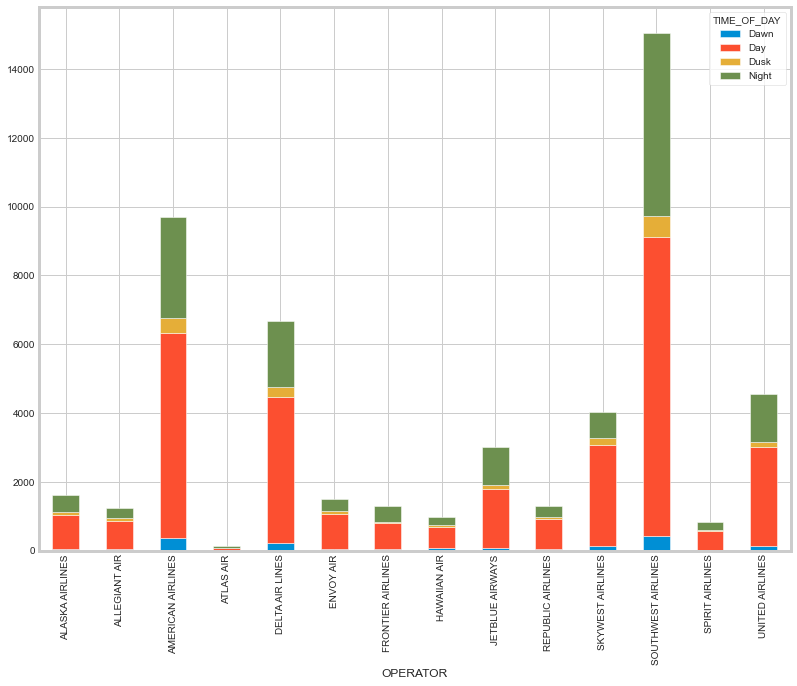

In [93]:
res_bird_strike.groupby(['OPERATOR', 'TIME_OF_DAY']).size().unstack().plot(kind='bar', stacked=True, figsize=(12,10))

In [94]:
## datarframe per airline
Airline1 = ['AMERICAN AIRLINES']
airline_res_bird_strike=res_bird_strike.loc[res_bird_strike['OPERATOR'].isin(Airline1)]

In [95]:
airline_res_bird_strike.head()

,INDX_NR,INCIDENT_DATE,STATE,AIRPORT_ID,AIRPORT,OPERATOR_ID,OPERATOR,AIRCRAFT,TYPE_ENG,SPECIES,...,REPORTED_TITLE,REPORTED_DATE,COMMENT,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE
4,638336,2000-05-08,OR,KPDX,PORTLAND INTL (OR),AAL,AMERICAN AIRLINES,MD-80,D,Unknown bird - medium,...,REDACTED,2000-07-14,NaN,PACIR,Tower,NaN,NaN,2000-07-14,False,False
16,638348,2000-10-09,MO,KMCI,KANSAS CITY INTL,AAL,AMERICAN AIRLINES,MD-80,D,Swallows,...,REDACTED,2001-05-14,NaN,Multiple,Airport Operations,NaN,NaN,2001-05-14,False,False
80,638412,2000-08-09,IL,KORD,CHICAGO O'HARE INTL ARPT,AAL,AMERICAN AIRLINES,MD-80,D,Unknown bird - small,...,REDACTED,2000-10-10,NaN,FAA Form 5200-7,Pilot,NaN,NaN,2000-10-10,False,False
82,638414,2000-11-08,MI,KDTW,DETROIT METRO WAYNE COUNTY ARPT,AAL,AMERICAN AIRLINES,B-737,D,Unknown bird - medium,...,REDACTED,2012-05-10,NaN,FAA Form 5200-7,Tower,NaN,NaN,2012-05-10,False,False
120,638452,2000-05-28,VA,KORF,NORFOLK INTL,AAL,AMERICAN AIRLINES,MD-80,D,Unknown bird - medium,...,REDACTED,2000-08-18,NaN,FAA Form 5200-7,Pilot,NaN,NaN,2000-08-18,False,False


In [96]:
#Total collisions of that Airline and what part of the day did it occur
my_list = airline_res_bird_strike['TIME_OF_DAY'].tolist()

   
frequency = {}
for word in my_list:
    count = frequency.get(word,0)
    frequency[word] = count + 1
     
frequency_list = airline_res_bird_strike['TIME_OF_DAY'].unique()
 
for words in frequency_list:
    print(words, frequency[words])

Day 5965
Night 2931
Dusk 442
Dawn 365
nan 2832


# RESTRICTED DATAFRAME BY YEAR

In [97]:
#To get infor of specific year of these airlines we have say for 2019
YEAR = 2019
year_res_bird_strike=res_bird_strike.loc[res_bird_strike['INCIDENT_YEAR'] == YEAR]

In [98]:
year_res_bird_strike.head()

,INDX_NR,INCIDENT_DATE,STATE,AIRPORT_ID,AIRPORT,OPERATOR_ID,OPERATOR,AIRCRAFT,TYPE_ENG,SPECIES,...,REPORTED_TITLE,REPORTED_DATE,COMMENT,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE
178838,817858,2019-01-15,HI,PHLI,LIHUE ARPT,HAL,HAWAIIAN AIR,B-717-200,D,Scaly-breasted munia,...,REDACTED,2019-02-20,"XXXX-X-XX-XXXXXX, RX /Legacy Record=XXXXXX/",FAA Form 5200-7-E,Air Transport Operations,NaN,NaN,2019-02-20,False,False
178843,817863,2019-01-07,CA,KLAX,LOS ANGELES INTL,SWA,SOUTHWEST AIRLINES,B-737-800,D,Perching birds (y),...,REDACTED,2019-02-20,"XXXX-X-X-XXXXXX, RX /Legacy Record=XXXXXX/",FAA Form 5200-7-E,Pilot,NaN,NaN,2019-02-20,False,False
178844,817864,2019-01-07,CA,KLAX,LOS ANGELES INTL,SKW,SKYWEST AIRLINES,CRJ100/200,D,Western meadowlark,...,REDACTED,2019-02-20,"XXXX-X-X-XXXXXX, RX /Legacy Record=XXXXXX/",FAA Form 5200-7-E,Airport Operations,NaN,NaN,2019-02-20,False,False
178852,817872,2019-01-07,OR,KPDX,PORTLAND INTL (OR),SWA,SOUTHWEST AIRLINES,B-737-700,D,Short-eared owl,...,REDACTED,2019-02-20,"XXXX-X-X-XXXXXX, RX , DAILY ALERT BULLETIN ...",Multiple,Airport Operations,NaN,NaN,2019-02-20,False,False
178855,817875,2019-01-01,CA,KSCK,STOCKTON METRO,AAY,ALLEGIANT AIR,A-319,D,Yellow-headed blackbird,...,REDACTED,2019-02-20,"XXXX-X-X-XXXXXX , DAILY ALERT BULLETIN ,XXXX-X...",Multiple,Airport Operations,NaN,NaN,2019-02-20,False,True


# Investigate phase of flight with the most bird strikes during Day/Night 

In [99]:
bird_strike_copy['PHASE_OF_FLIGHT'].unique()

array(['Take-off Run', 'Approach', 'En Route', 'Landing Roll', nan,
       'Climb', 'Descent', 'Arrival', 'Local', 'Taxi', 'Parked',
       'Departure', 'Unknown'], dtype=object)

In [100]:
#Let us split the data according to Day/Night
#First let us split the data with day
day_bird_strike_copy=bird_strike_copy.loc[bird_strike_copy['TIME_OF_DAY'] == 'Day']

In [101]:
day_bird_strike_copy.head()

,INDX_NR,INCIDENT_DATE,STATE,AIRPORT_ID,AIRPORT,OPERATOR_ID,OPERATOR,AIRCRAFT,TYPE_ENG,SPECIES,...,REPORTED_TITLE,REPORTED_DATE,COMMENT,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE
0,638332,2007-05-27,TX,KHOU,WILLIAM P HOBBY ARPT,SWA,SOUTHWEST AIRLINES,B-737-300,D,Eastern meadowlark,...,REDACTED,2007-08-21,TWO XXXX-X (XXXX-X-XX-XXXXXX & X-X-XXXXXX) /Le...,FAA Form 5200-7-E,Pilot,NaN,NaN,2007-08-21,False,True
1,638333,2007-05-27,NaN,ZZZZ,UNKNOWN,USA,1US AIRWAYS,B-737-400,D,Gulls,...,REDACTED,2007-08-21,NaN,FAA Form 5200-7,Air Transport Operations,NaN,NaN,2007-08-21,False,True
2,638334,2000-08-06,NaN,ZZZZ,UNKNOWN,BUS,BUSINESS,BE-33,A,Unknown bird - small,...,REDACTED,2000-10-06,NaN,FAA Form 5200-7,Pilot,NaN,NaN,2000-10-06,False,True
4,638336,2000-05-08,OR,KPDX,PORTLAND INTL (OR),AAL,AMERICAN AIRLINES,MD-80,D,Unknown bird - medium,...,REDACTED,2000-07-14,NaN,PACIR,Tower,NaN,NaN,2000-07-14,False,False
6,638338,2000-08-28,NJ,KTTN,TRENTON MERCER ARPT,TCF,SHUTTLE AMERICA,DHC8 DASH 8,C,Crows,...,REDACTED,2015-03-05,NaN,FAA Form 5200-7,Pilot,NaN,NaN,2015-03-05,False,False


In [102]:
#During the day when does the airplane get hit the most
day_bird_strike_copy_count=day_bird_strike_copy['PHASE_OF_FLIGHT'].value_counts(sort=True).rename_axis('FlightPhase').reset_index(name='birdstrikes')
day_bird_strike_copy_count

,FlightPhase,birdstrikes
0,Approach,23639
1,Landing Roll,15322
2,Take-off Run,14931
3,Climb,11090
4,En Route,1338
5,Departure,1079
6,Descent,462
7,Local,415
8,Arrival,360
9,Taxi,240


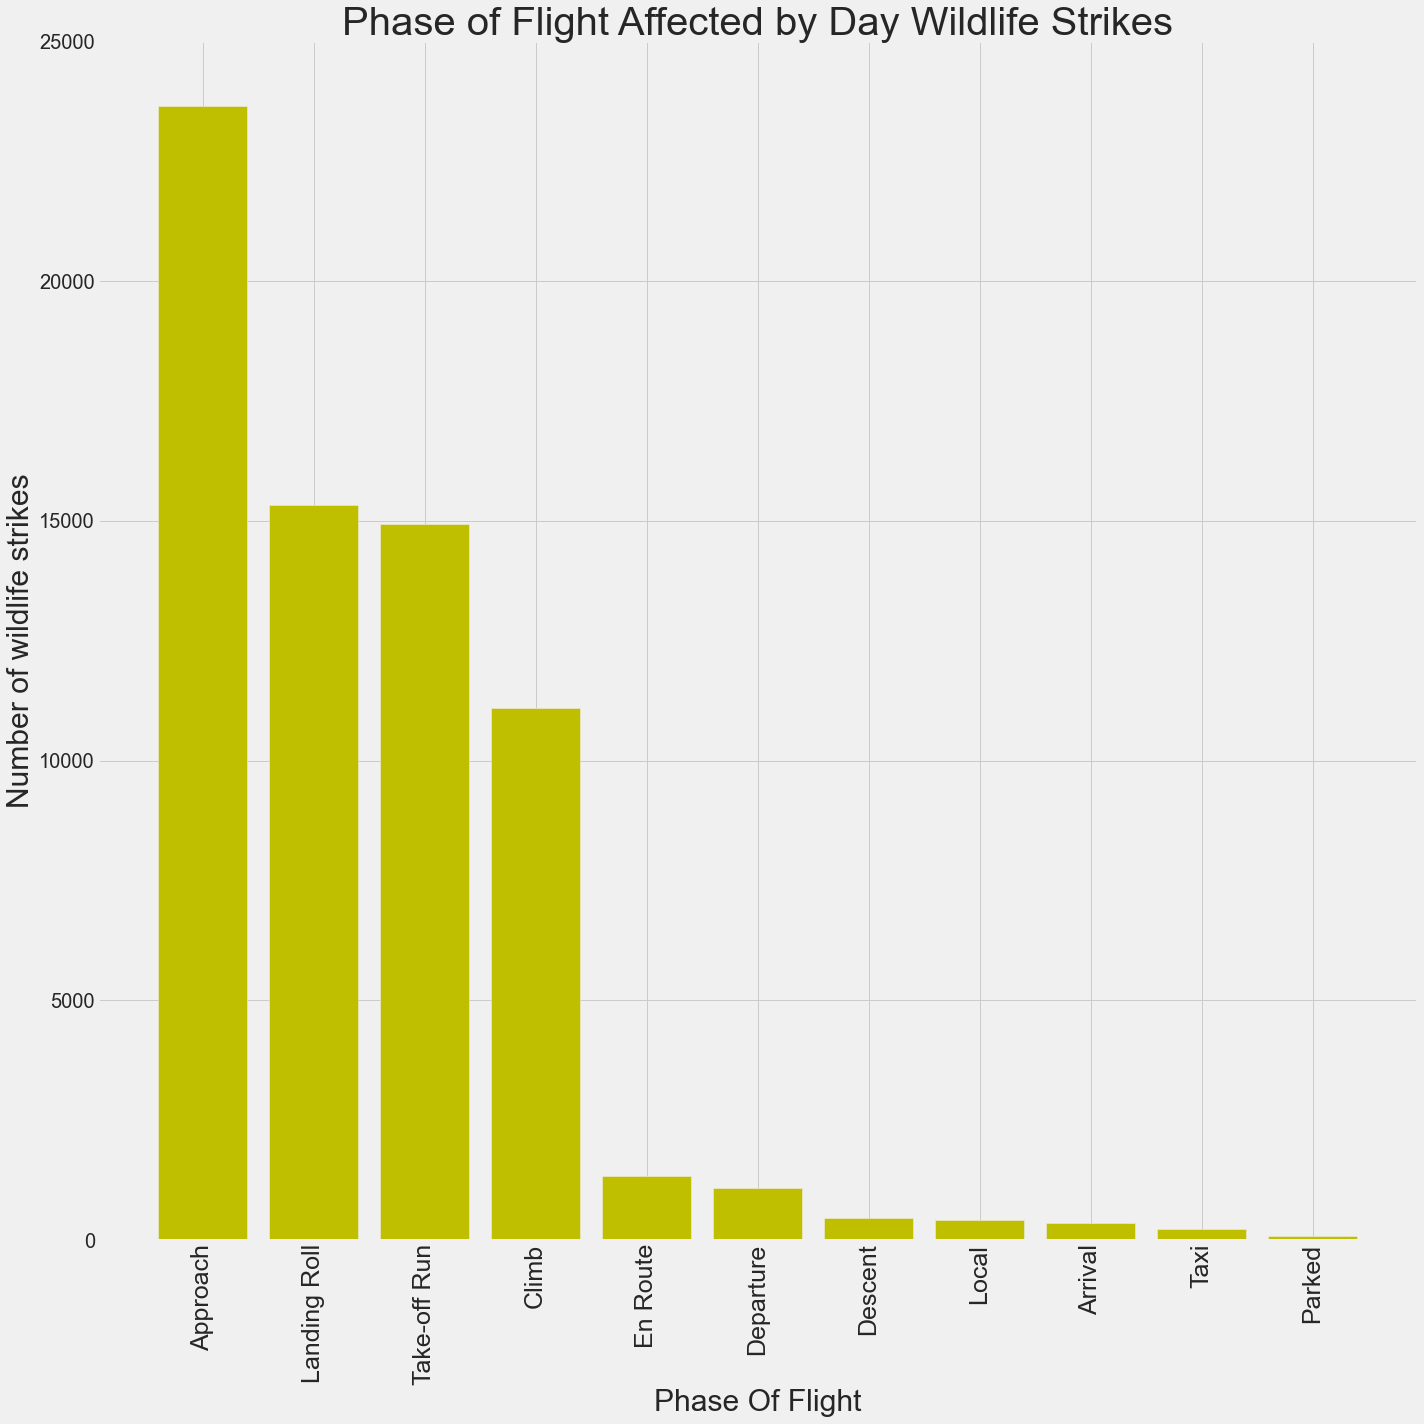

In [124]:
plt.figure(figsize=(20,20))

plt.bar(day_bird_strike_copy_count.FlightPhase[0:11],day_bird_strike_copy_count.birdstrikes[0:11],color='y')
plt.xticks(rotation=90, fontsize=25)
plt.yticks([0, 5000, 10000, 15000, 20000, 25000],fontsize=20)
plt.xlabel("Phase Of Flight", fontsize=30)
plt.ylabel("Number of wildlife strikes", fontsize=30)
plt.title("Phase of Flight Affected by Day Wildlife Strikes", fontsize=40)
plt.tight_layout()
plt.savefig('Bird Strike during day', transparent=True)
plt.show()


In [104]:
#Now let us split the data with night
night_bird_strike_copy=bird_strike_copy.loc[bird_strike_copy['TIME_OF_DAY'] == 'Night']

In [105]:
#During the night when does the airplane get hit the most
night_bird_strike_copy_count=night_bird_strike_copy['PHASE_OF_FLIGHT'].value_counts(sort=True).rename_axis('FlightPhase1').reset_index(name='birdstrikes1')
night_bird_strike_copy_count.drop([night_bird_strike_copy_count.index[10]])

,FlightPhase1,birdstrikes1
0,Approach,22401
1,Climb,4587
2,Landing Roll,3228
3,Take-off Run,1734
4,En Route,1578
5,Descent,859
6,Departure,143
7,Taxi,108
8,Local,82
9,Arrival,81


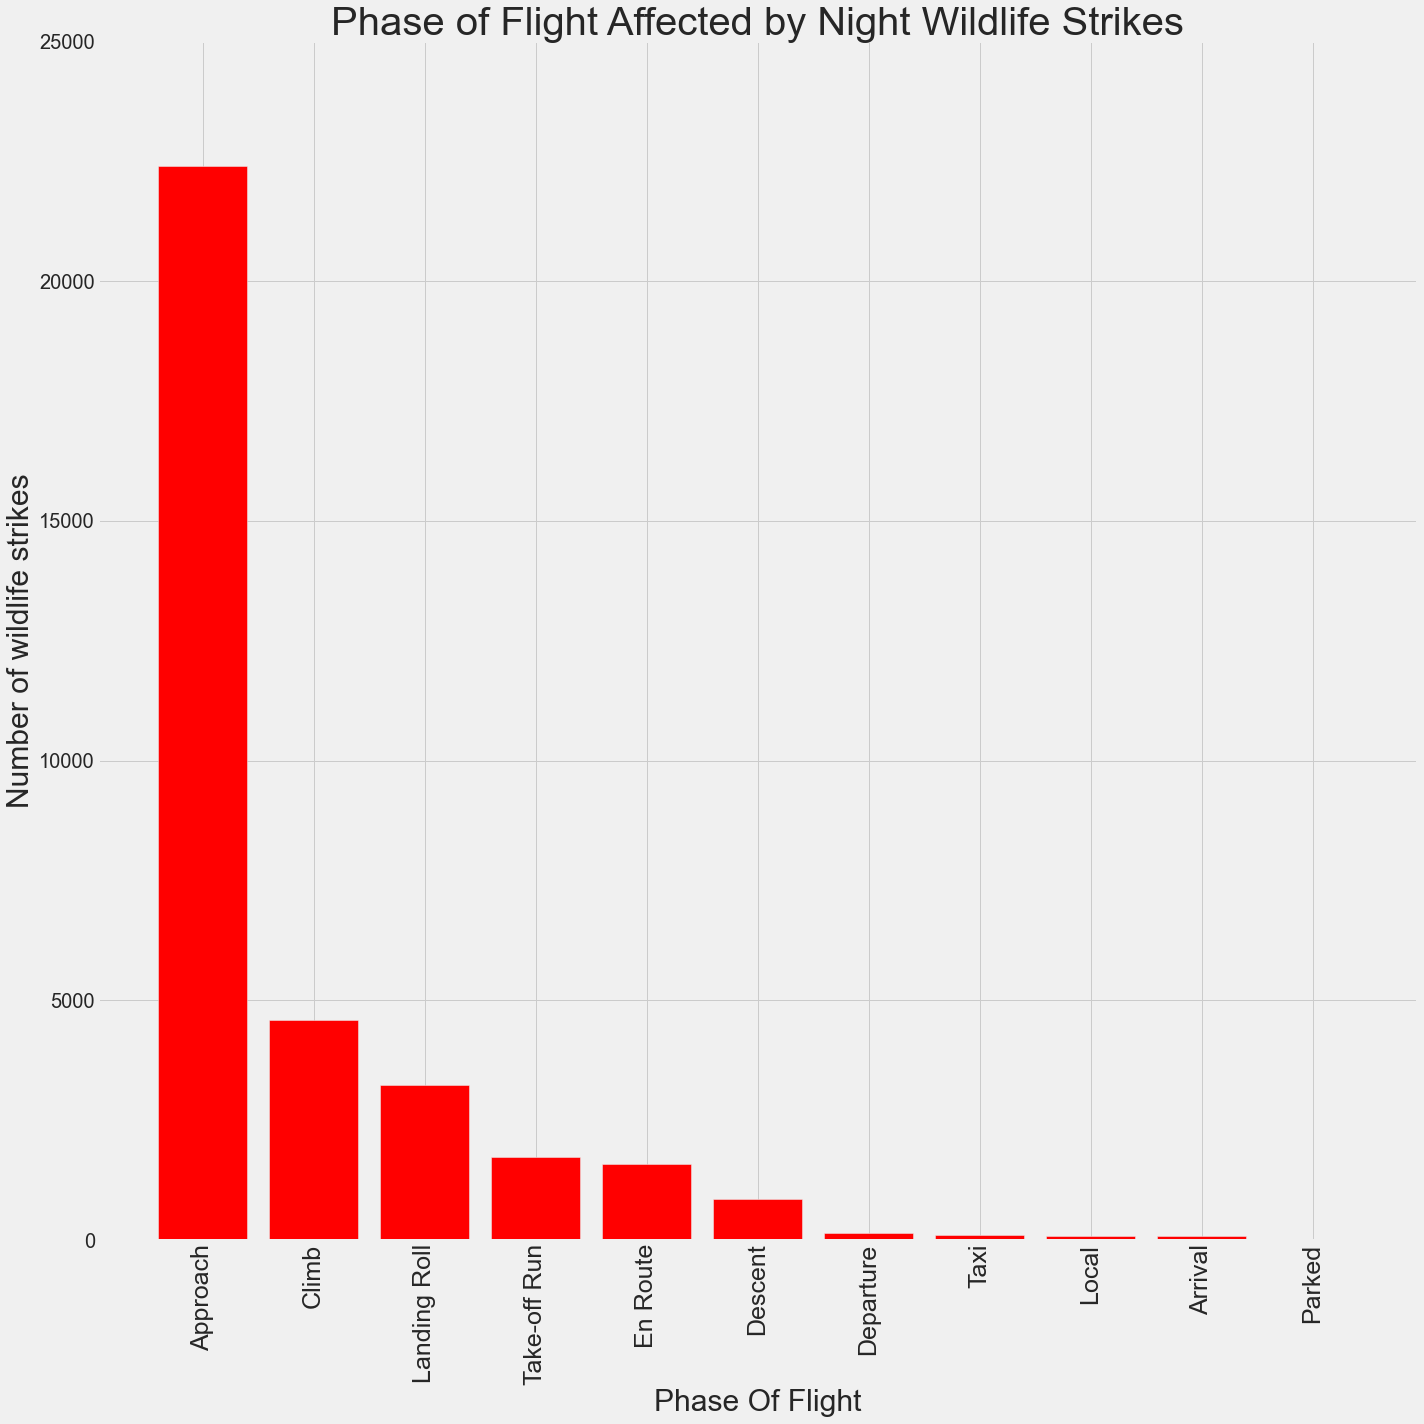

In [120]:
plt.figure(figsize=(20,20))
plt.bar(night_bird_strike_copy_count.drop([night_bird_strike_copy_count.index[10]]).FlightPhase1[0:11],night_bird_strike_copy_count.birdstrikes1[0:11],color='r')
plt.xticks(rotation=90, fontsize=25)
plt.yticks([0, 5000, 10000, 15000, 20000, 25000],fontsize=20)
plt.xlabel("Phase Of Flight", fontsize=30)
plt.ylabel("Number of wildlife strikes", fontsize=30)
plt.title("Phase of Flight Affected by Night Wildlife Strikes", fontsize=40)
plt.tight_layout()
plt.savefig('Bird Strike At Night', transparent=True)
plt.show()

In [ ]:
bird_strike['INCIDENT_MONTH'].unique()

In [ ]:
bird_strike['STATE'].unique()

Strikes per States from 2000-2019

In [112]:
#Total number of collisions per airport from 2000-2019
State_count = bird_strike['STATE'].value_counts(sort=True).rename_axis('State').reset_index(name='counts')
print(State_count)

   State  counts
0     TX   18217
1     CA   14593
2     FL   13132
3     NY    9595
4     CO    8946
5     IL    8413
6     OH    6206
7     TN    6110
8     PA    5887
9     NJ    5470
10    MI    5189
11    MO    4911
12    KY    4530
13    NC    4014
14    GA    3547
15    FN    3394
16    HI    3383
17    IN    3115
18    WA    3022
19    LA    3014
20    DC    2930
21    UT    2907
22    OR    2848
23    AZ    2830
24    MA    2671
25    MD    2202
26    WI    2143
27    MN    2106
28    NE    2035
29    VA    1979
..   ...     ...
33    AL    1467
34    IA    1372
35    AR    1062
36    AK     993
37    ND     983
38    MS     939
39    NH     926
40    NV     891
41    RI     886
42    KS     802
43    SD     712
44    ID     638
45    ME     633
46    NM     572
47    MT     544
48    PI     481
49    WV     462
50    PR     407
51    VT     303
52    WY     237
53    VI     214
54    DE     190
55    ON     144
56    BC     102
57    QC      45
58    AB      41
59    MB      

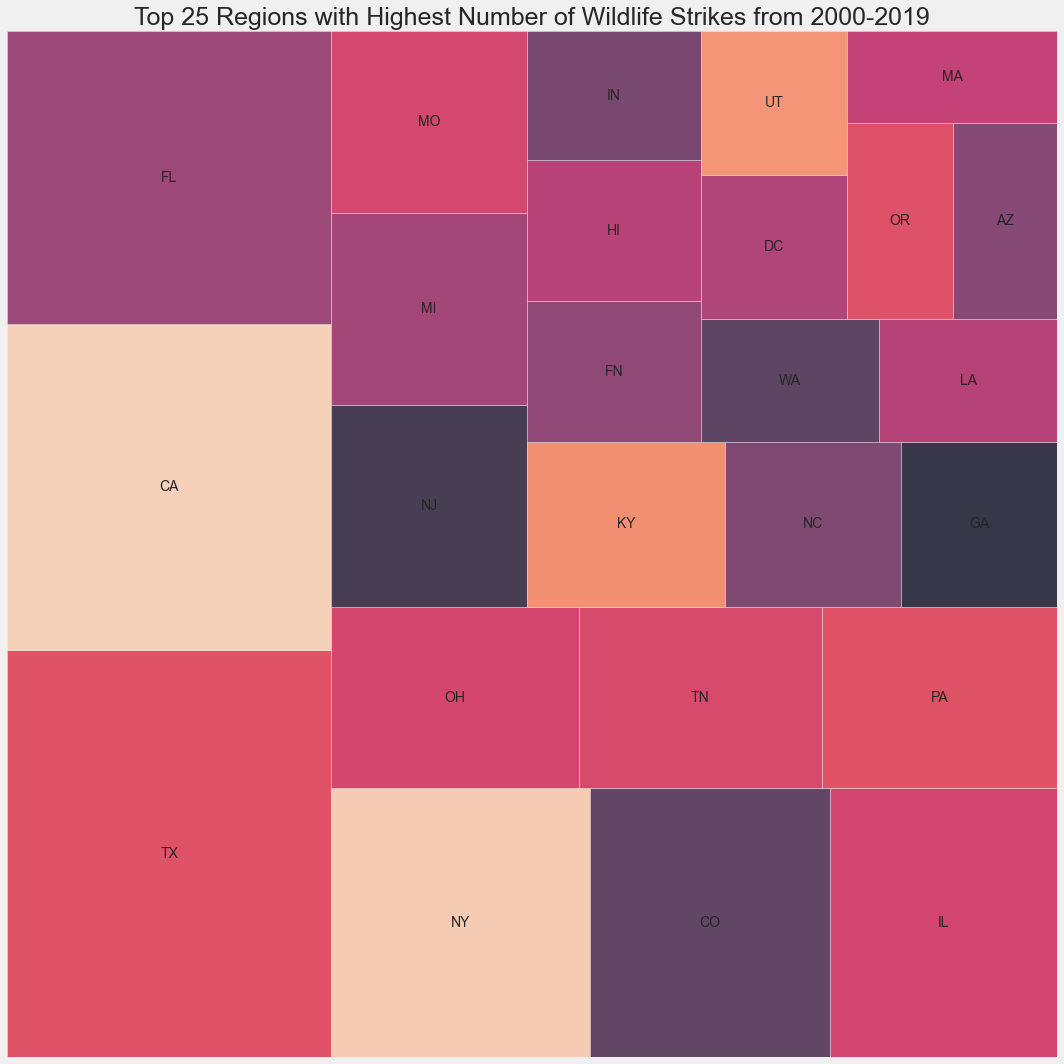

In [126]:
# plotting a tree map

y = State_count['State'].value_counts().head(25)
    
plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fivethirtyeight')

#color = plt.cm.magma(np.linspace(0, 1, 25))
squarify.plot(sizes = State_count.counts.head(25), label=State_count.State.head(25), alpha=.8)
plt.title('Top 25 Regions with Highest Number of Wildlife Strikes from 2000-2019', fontsize = 25)

plt.axis('off')
plt.tight_layout()
plt.savefig('Top 25 States with the most bird strikes',transparent=True)
plt.show()